#### Team member information-
 #### 1.  Name - Rathang Rajpal
 #### NET ID - RXR210009
 #### 2.  Name - Yash Vijaynarayan Gupta
 #### NET ID - YXG210002

 #### Course - CS 6364
 #### Course Name - Artificial Intelligence
 #### Section number - 002

 #### End Term Project

In [ ]:
import numpy as np
import torch
import torch.nn as nn
from torchvision import datasets
from torchvision import transforms
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib as plt
from sklearn.manifold import TSNE


In [ ]:
# Setting the device 
if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

In [ ]:
cifar_training_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())

imgs_object = [item[0] for item in cifar_training_dataset] # item[0] and item[1] are image and its label
imgs_object = torch.stack(imgs_object, dim=0).numpy()

# calculate mean over each channel (r,g,b)
mean_red_val = imgs_object[:,0,:,:].mean()
mean_green_val = imgs_object[:,1,:,:].mean()
mean_blue_val = imgs_object[:,2,:,:].mean()
print("Mean values",mean_red_val,mean_green_val,mean_blue_val)

# calculate std over each channel (r,g,b)
std_red_val = imgs_object[:,0,:,:].std()
std_green_val = imgs_object[:,1,:,:].std()
std_blue_val = imgs_object[:,2,:,:].std()
print("Standard deviation values",std_red_val,std_green_val,std_blue_val)

Files already downloaded and verified
Mean values 0.49139968 0.48215827 0.44653124
Standard deviation values 0.24703233 0.24348505 0.26158768


In [ ]:
from numpy.lib.shape_base import dstack
# Getting the Dataset from the datasets library

from torchvision import datasets as ds
from torchvision import transforms as tfs
from torch.utils.data.sampler import SubsetRandomSampler

# Creating a function to load our data and passing all the required parameters

def load_data_project(dataAddr, bs1, vs=0.1, shuffle=True, test=False):  
    nrm = tfs.Normalize(mean=[0.4913, 0.4821, 0.4465],std=[0.2470, 0.2435, 0.2615],)

    # use torchvision transforms on the data
    tf = tfs.Compose([tfs.Resize((224,224)), tfs.ToTensor(), nrm,])

    # If we are trying to load the test dataset
    if test == True:
        dsCurr = ds.CIFAR10(root=dataAddr, train=False,download=True,transform=tf,)

        load_data_project = torch.utils.data.DataLoader(dsCurr, batch_size=bs1, shuffle=shuffle)

        return load_data_project

    # load the dataset into train and validation variables
    dsCurrTrain = ds.CIFAR10(root=dataAddr, train=True, download=True, transform=tf,)

    dsCurrValid = ds.CIFAR10(root=dataAddr, train=True, download=True, transform=tf, )

    x = len(dsCurrTrain)
    positions = list(range(x))
    div = int(np.floor(vs * x))

    # To check and shuffle data accordingly
    if shuffle == True:
        np.random.seed(42)
        np.random.shuffle(positions)

    train_idx, valid_idx = positions[div:], positions[:div]
    train_sampler = SubsetRandomSampler(train_idx)
    valid_sampler = SubsetRandomSampler(valid_idx)

    trainLoaderCurr = torch.utils.data.DataLoader(dsCurrTrain, batch_size=bs1, sampler=train_sampler)
    validLoaderCurr = torch.utils.data.DataLoader(dsCurrValid, batch_size=bs1, sampler=valid_sampler)
    return (trainLoaderCurr, validLoaderCurr)
 
train_loader, valid_loader = load_data_project('./data',64)

test_loader = load_data_project('./data',64,test=True)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [ ]:
train_loader.dataset.classes #10 classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
#count of total number of instances for each class in training data
instance_count = dict()
ds = train_loader.dataset
for z in ds:
  lab = ds.classes[z[1]]
  if lab not in instance_count:
    instance_count[lab] = 1
  else:
    instance_count[lab] += 1
instance_count

{'frog': 5000,
 'truck': 5000,
 'deer': 5000,
 'automobile': 5000,
 'bird': 5000,
 'horse': 5000,
 'ship': 5000,
 'cat': 5000,
 'dog': 5000,
 'airplane': 5000}

images shape is torch.Size([64, 3, 224, 224])


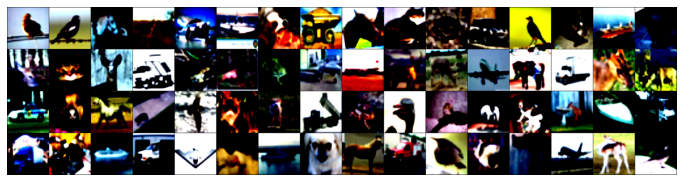

In [ ]:
#training set
from torchvision.utils import make_grid
from matplotlib import figure
import sys
from pylab import *
for p, _ in train_loader:
    print('images shape is', p.shape)
    plt.figure(figsize=(12,6))
    plt.axis('off')
    plt.imshow(make_grid(p, nrow=16).permute((1, 2, 0)))
    break

images shape is torch.Size([64, 3, 224, 224])


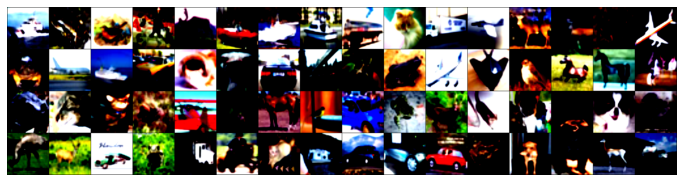

In [ ]:
#validation set

for p, _ in valid_loader:
    print('images shape is', p.shape)
    plt.figure(figsize=(12,6))
    plt.axis('off')
    plt.imshow(make_grid(p, nrow=16).permute((1, 2, 0)))
    break

images shape is torch.Size([64, 3, 224, 224])


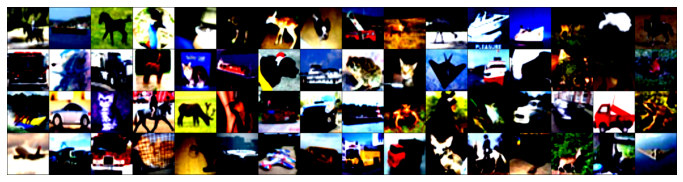

In [ ]:
#Test set

for p, _ in test_loader:
    print('images shape is', p.shape)
    plt.figure(figsize=(12,6))
    plt.axis('off')
    plt.imshow(make_grid(p, nrow=16).permute((1, 2, 0)))
    break

Loading imports and dataset (CIFAR10) for EDA and PCA purposes

In [ ]:
from keras.datasets import cifar10
import numpy as np

(x_trainer, y_trainer), (x_tester, y_tester) = cifar10.load_data()
del [x_tester,y_tester]

np.random.seed(seed=222)
idx_track=np.empty(0,dtype="int8")
for i in range(0,len(np.unique(y_trainer))):
    idx_track=np.append(idx_track,np.random.choice(np.where((y_trainer[0:len(y_trainer)])==i)[0],100,replace=False))

x_train= x_trainer[idx_track]
y_train= y_trainer[idx_track]

170498071/170498071 [==============================] - 14s 0us/step


PCA for CIFAR10 dataset

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as imgplot
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from pylab import *
import time
import tensorflow as tf
import keras
import sys

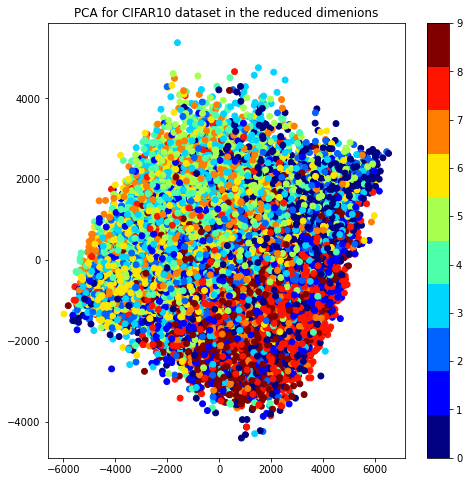

In [ ]:
from sklearn.decomposition import PCA
from matplotlib import *
pca_object = PCA(n_components=2)
pca_object.fit(x_trainer.reshape((len(x_trainer),32*32*3)))
plt.figure(figsize=(8,8))
cmap_config = cm.get_cmap('jet', 10)
plt.scatter(x=pca_object.transform(x_trainer.reshape((len(x_trainer),32*32*3)))[:,0],
            y=pca_object.transform(x_trainer.reshape((len(x_trainer),32*32*3)))[:,1],
            c=y_trainer.reshape(len(x_trainer)),s=35,cmap=cmap_config)
plt.title("PCA for CIFAR10 dataset in the reduced dimenions")
plt.colorbar()
plt.show()

t-SNE for CIFAR10

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


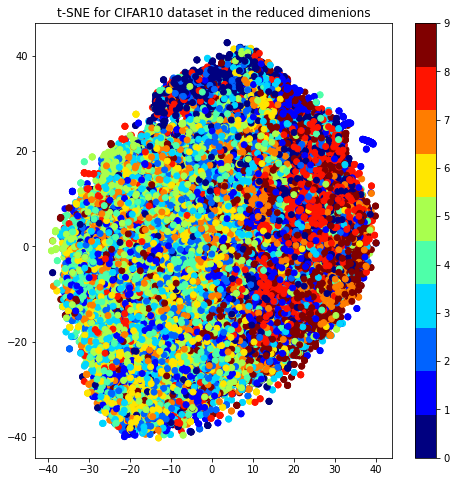

In [ ]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
tsne_object = model.fit_transform(x_trainer.reshape((len(x_trainer),32*32*3)))
plt.figure(figsize=(8,8))
cmap_config = cm.get_cmap('jet', 10)
plt.scatter(x=tsne_object[:,0],y=tsne_object[:,1],c=y_trainer.reshape(len(x_trainer)),s=35,cmap=cmap_config)
plt.title("t-SNE for CIFAR10 dataset in the reduced dimenions")
plt.colorbar()
plt.show()